## Kalmogorv-Arnold Example
`Kalmogorv-Arnold theorm` tells us that any continous function of several variables can be represented as a composition and sum of functions of one variable. In the context of neural networks, theorm offers a theoretical foundation for understanding how neural networks even simple ones can approximate complex multivariable functions.

Let's see an example where we approximate `f(x, y) = sin(x) + cos(y)` using a neural net.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# define target fn(x, y) = sin(x) + cos(y)
def target_fn(x, y):
    return np.sin(x) + np.cos(y)

# dataset
x = np.linspace(0, 2 * np.pi, 400)
y = np.linspace(0, 2 * np.pi, 400)
x_grid, y_grid = np.meshgrid(x, y)
z_grid = target_fn(x_grid, y_grid)

# Tensors
x_tensor = torch.tensor(x_grid.reshape(-1, 1), dtype=torch.float32)
y_tensor = torch.tensor(y_grid.reshape(-1, 1), dtype=torch.float32)
z_tensor = torch.tensor(z_grid.reshape(-1, 1), dtype=torch.float32)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 64) # Input
        self.fc2 = nn.Linear(64, 64) # Hidden
        self.fc3 = nn.Linear(64, 1) # Output

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)

        return x

Epoch [1/1000], Loss: 0.9418
Epoch [101/1000], Loss: 0.0157
Epoch [201/1000], Loss: 0.0036
Epoch [301/1000], Loss: 0.0025
Epoch [401/1000], Loss: 0.0018
Epoch [501/1000], Loss: 0.0021
Epoch [601/1000], Loss: 0.0011
Epoch [701/1000], Loss: 0.0009
Epoch [801/1000], Loss: 0.0008
Epoch [901/1000], Loss: 0.0006


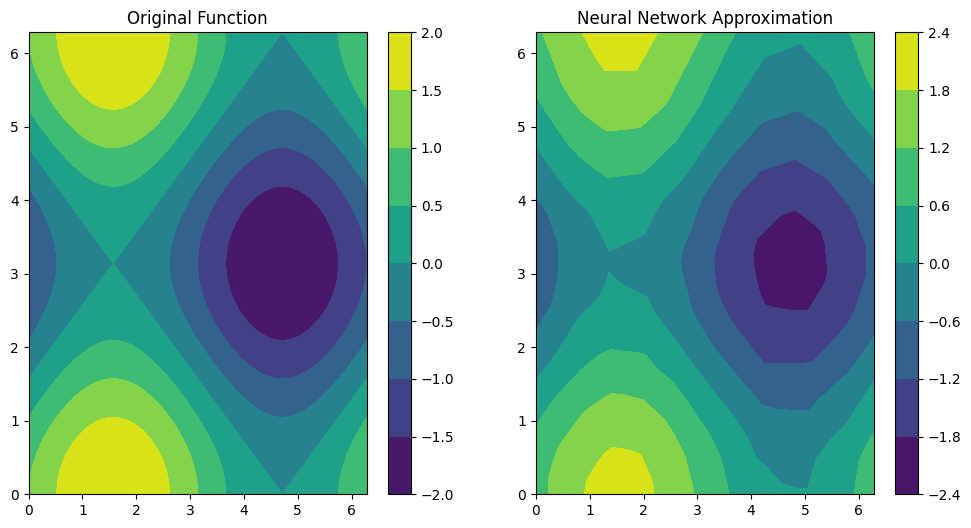

In [4]:
net = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

inputs = torch.cat((x_tensor, y_tensor), 1)

# Train loop
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, z_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Test
with torch.no_grad():
    pred = net(inputs).reshape(400, 400).numpy()

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Function')
plt.contourf(x_grid, y_grid, z_grid, cmap='viridis')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title('Neural Network Approximation')
plt.contourf(x_grid, y_grid, pred, cmap='viridis')
plt.colorbar()
plt.show()